In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cars = pd.read_csv('/content/datasetCarPrice.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.shape

(205, 26)

In [ ]:
cars.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName  ... citympg highwaympg    price
0         1          3        alfa-romero giulia  ...      21         27  13495.0
1         2          3       alfa-romero stelvio  ...      21         27  16500.0
2         3          1  alfa-romero Quadrifoglio  ...      19         26  16500.0
3         4          2               audi 100 ls  ...      24         30  13950.0
4         5          2                audi 100ls  ...      18         22  17450.0
..      ...        ...                       ...  ...     ...        ...      ...
200     201         -1           volvo 145e (sw)  ...      23         28  16845.0
201     202         -1               volvo 144ea  ...      19         25  19045.0
202     203         -1               volvo 244dl  ...      18         23  21485.0
203     204         -1                 volvo 246  ...      26         27  22470.0
204     205         -1               volvo 264gl  ...      19   

In [ ]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
cars.CompanyName=cars.CompanyName.str.lower()

def replace_name(a,b):
  cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [ ]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

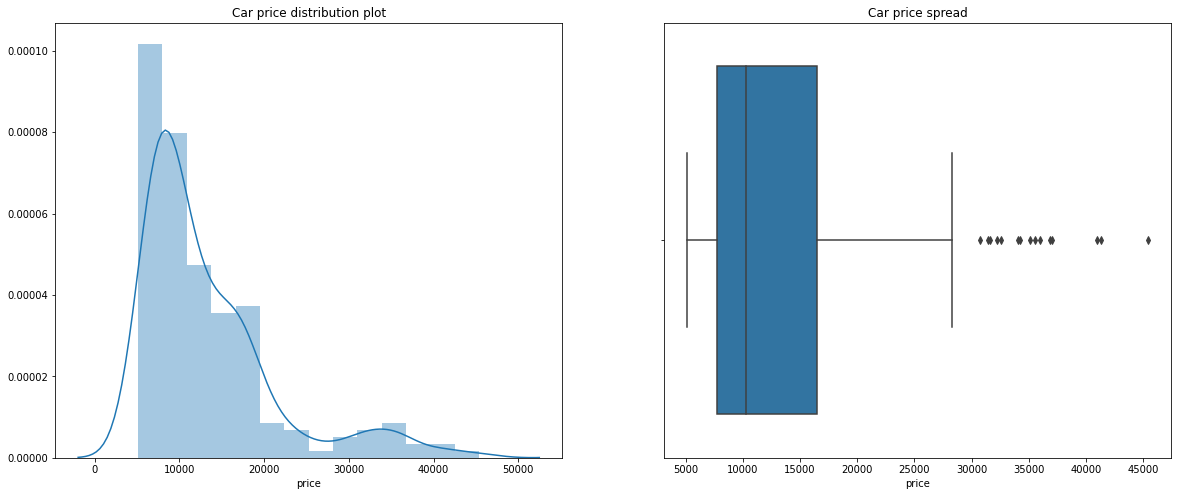

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title("Car price distribution plot")
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title("Car price spread")
sns.boxplot(cars.price)
plt.show()

In [ ]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


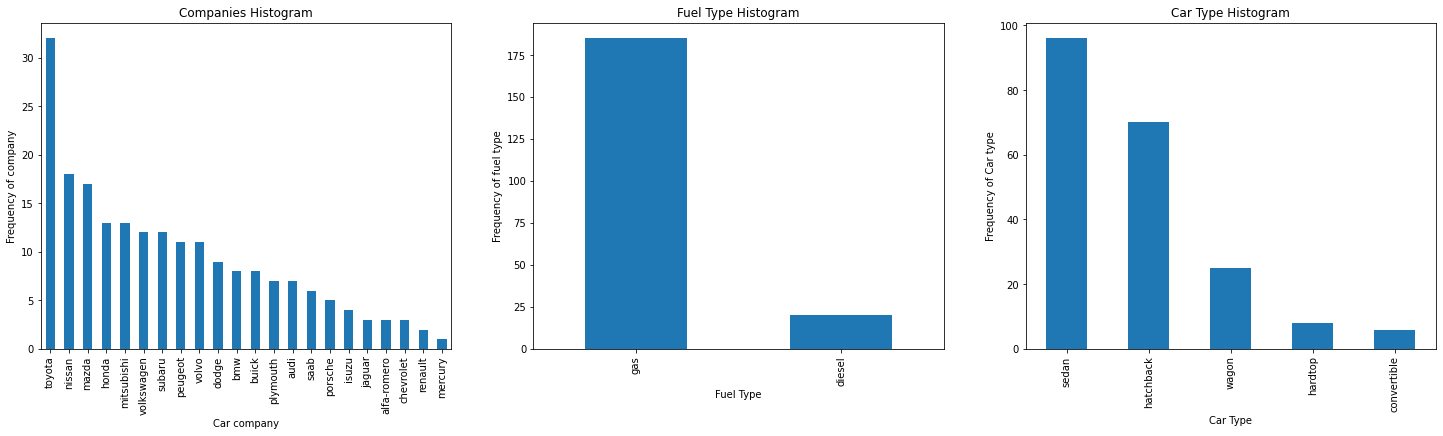

In [ ]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

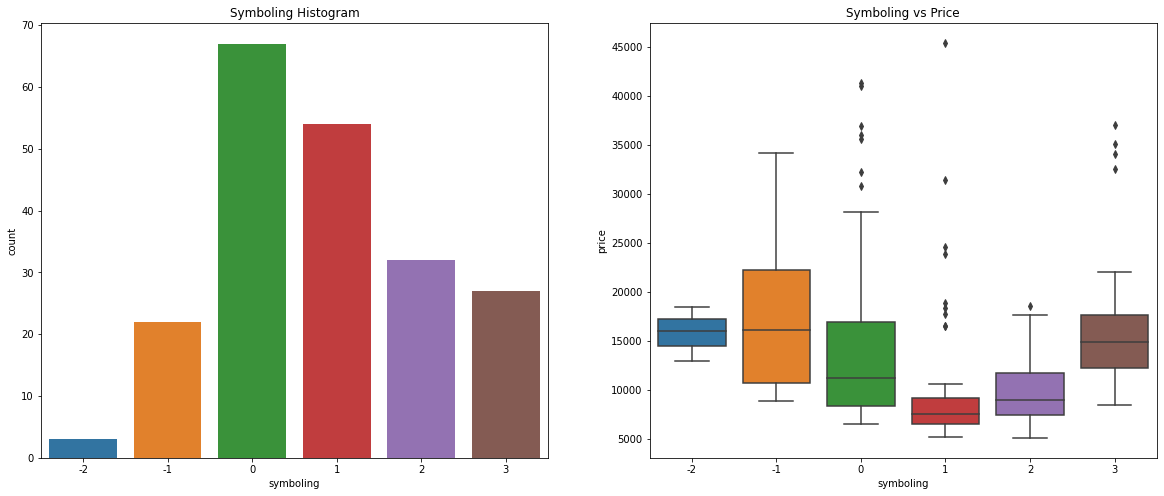

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price)

plt.show()

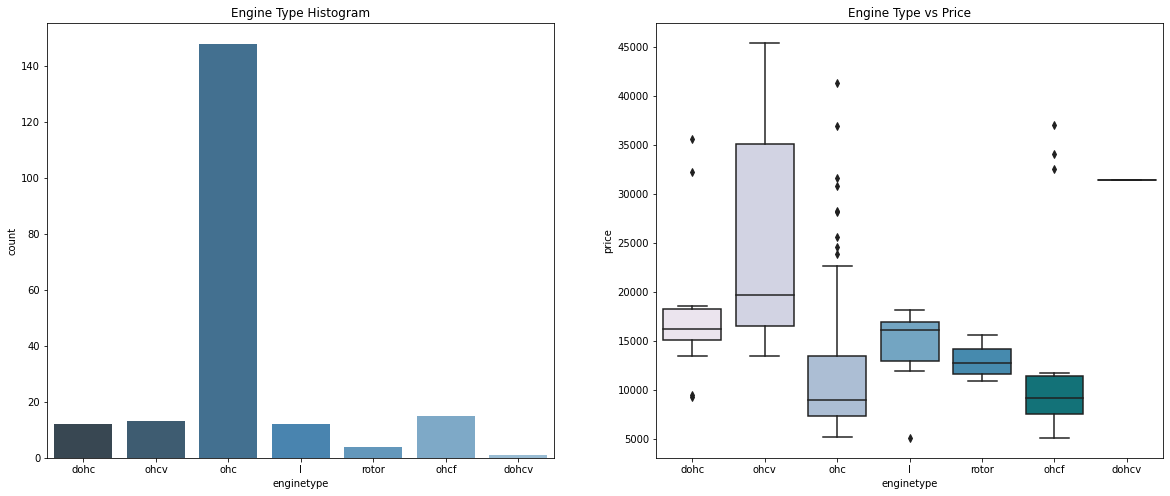

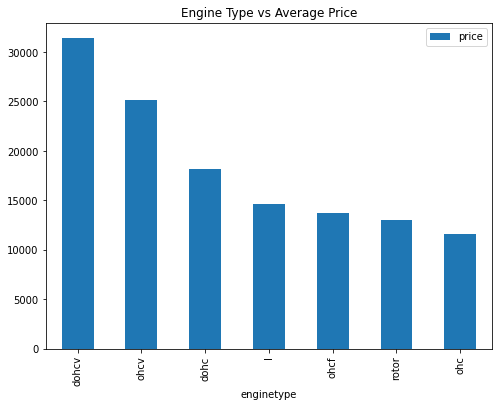

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

<Figure size 1800x432 with 0 Axes>

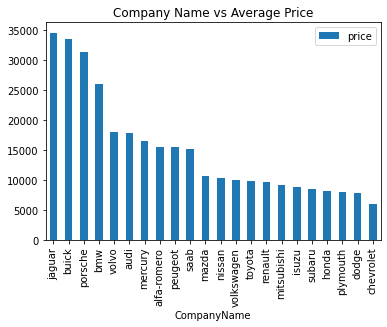

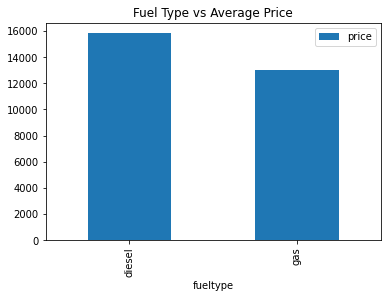

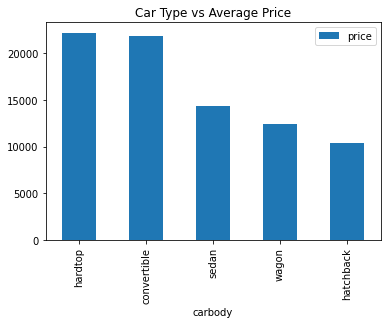

In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

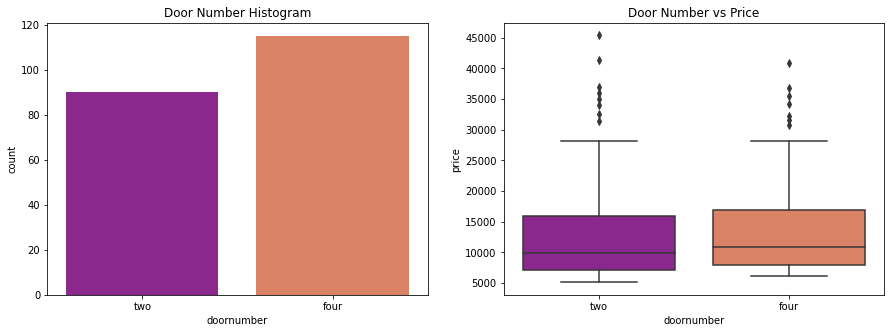

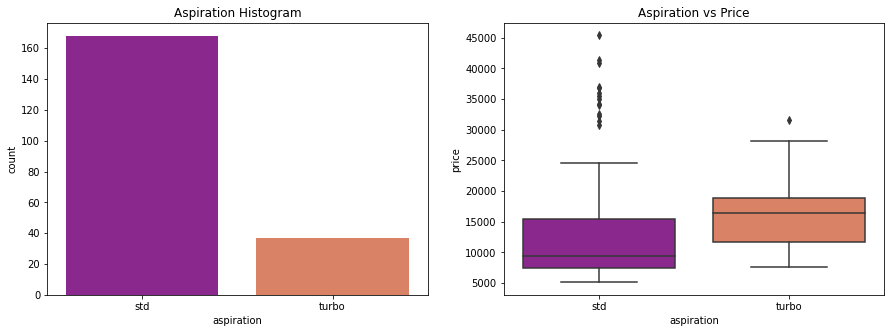

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door Number Histogram')
sns.countplot(cars.doornumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=cars.doornumber, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(cars.aspiration, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=cars.aspiration, y=cars.price, palette=("plasma"))

plt.show()

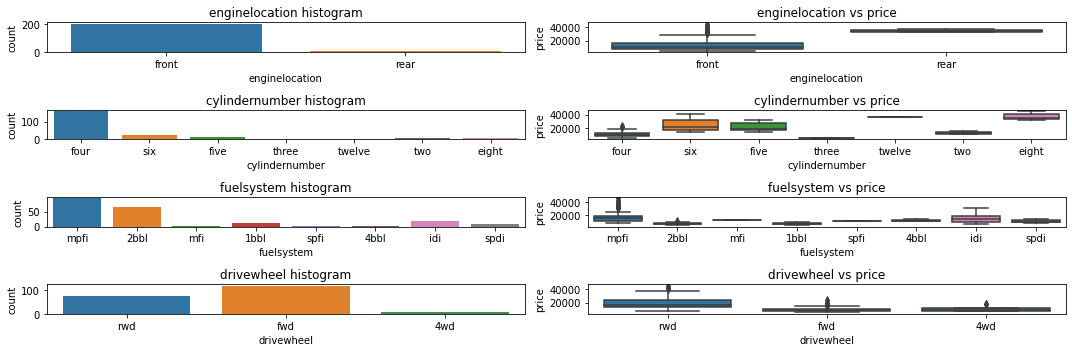

In [ ]:
def count_plot(x,fig):
  plt.subplot(4,2,fig)
  plt.title(x+" histogram")
  sns.countplot(cars[x])
  plt.subplot(4,2,(fig+1))
  plt.title(x+" vs price")
  sns.boxplot(x=cars[x],y=cars.price)
plt.figure(figsize=(15,5))
count_plot('enginelocation',1)
count_plot('cylindernumber',3)
count_plot('fuelsystem',5)
count_plot('drivewheel',7)
plt.tight_layout()

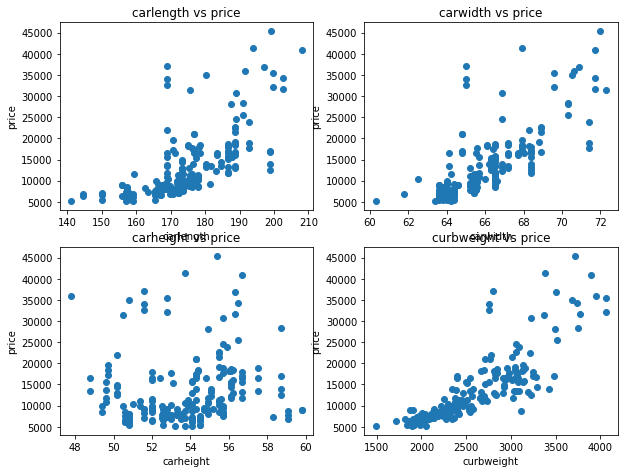

<Figure size 432x288 with 0 Axes>

In [ ]:
def scatter(x,fig):
  plt.subplot(5,2,fig)
  plt.scatter(cars[x],cars['price'])
  plt.title(x+ ' vs price')
  plt.ylabel('price')
  plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength',1)  
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)
plt.show()
plt.tight_layout()

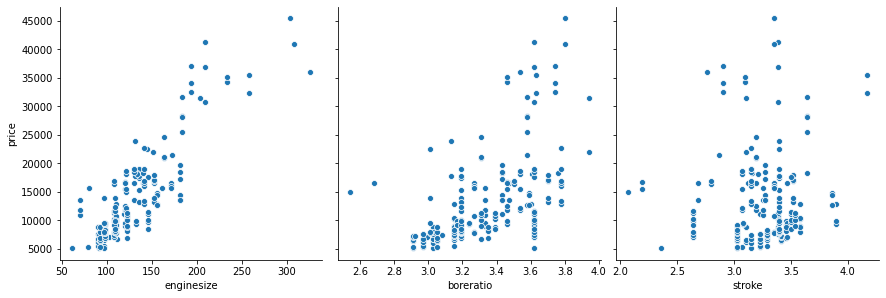

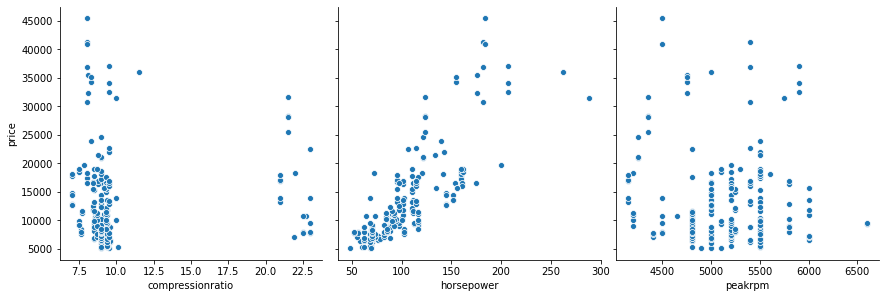

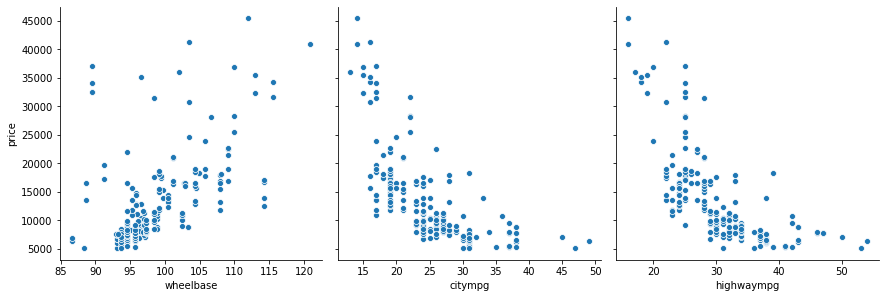

In [ ]:
def pair(x,y,z):
  sns.pairplot(cars,x_vars=[x,y,z],y_vars='price',size=4,aspect=1,kind='scatter')
  plt.show()
pair('enginesize', 'boreratio', 'stroke')
pair('compressionratio', 'horsepower', 'peakrpm')
pair('wheelbase', 'citympg', 'highwaympg')  

**Step 4 : Deriving new feature**

In [ ]:
cars['fueleconomy']=(.55*cars['citympg'])+(.45*cars['highwaympg'])


In [ ]:
cars['price'] = cars['price'].astype('int')

**Step 5 : Bivariate Analysis**

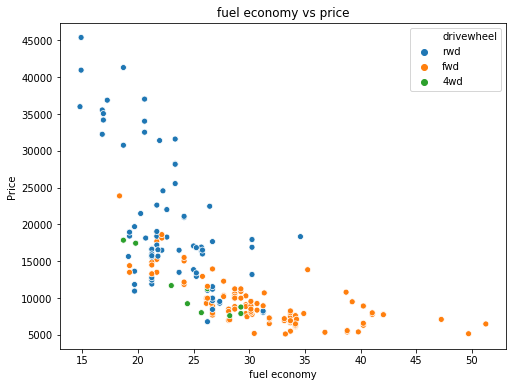

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(cars['fueleconomy'],cars['price'],hue=cars['drivewheel'])
plt.title("fuel economy vs price")
plt.xlabel('fuel economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()


<Figure size 1800x432 with 0 Axes>

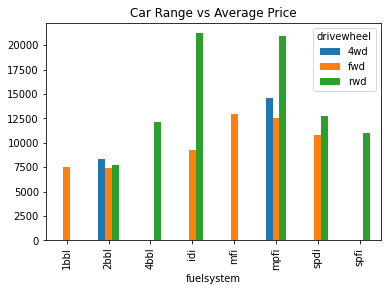

In [ ]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()


In [ ]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower','fueleconomy', 'carlength','carwidth']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4


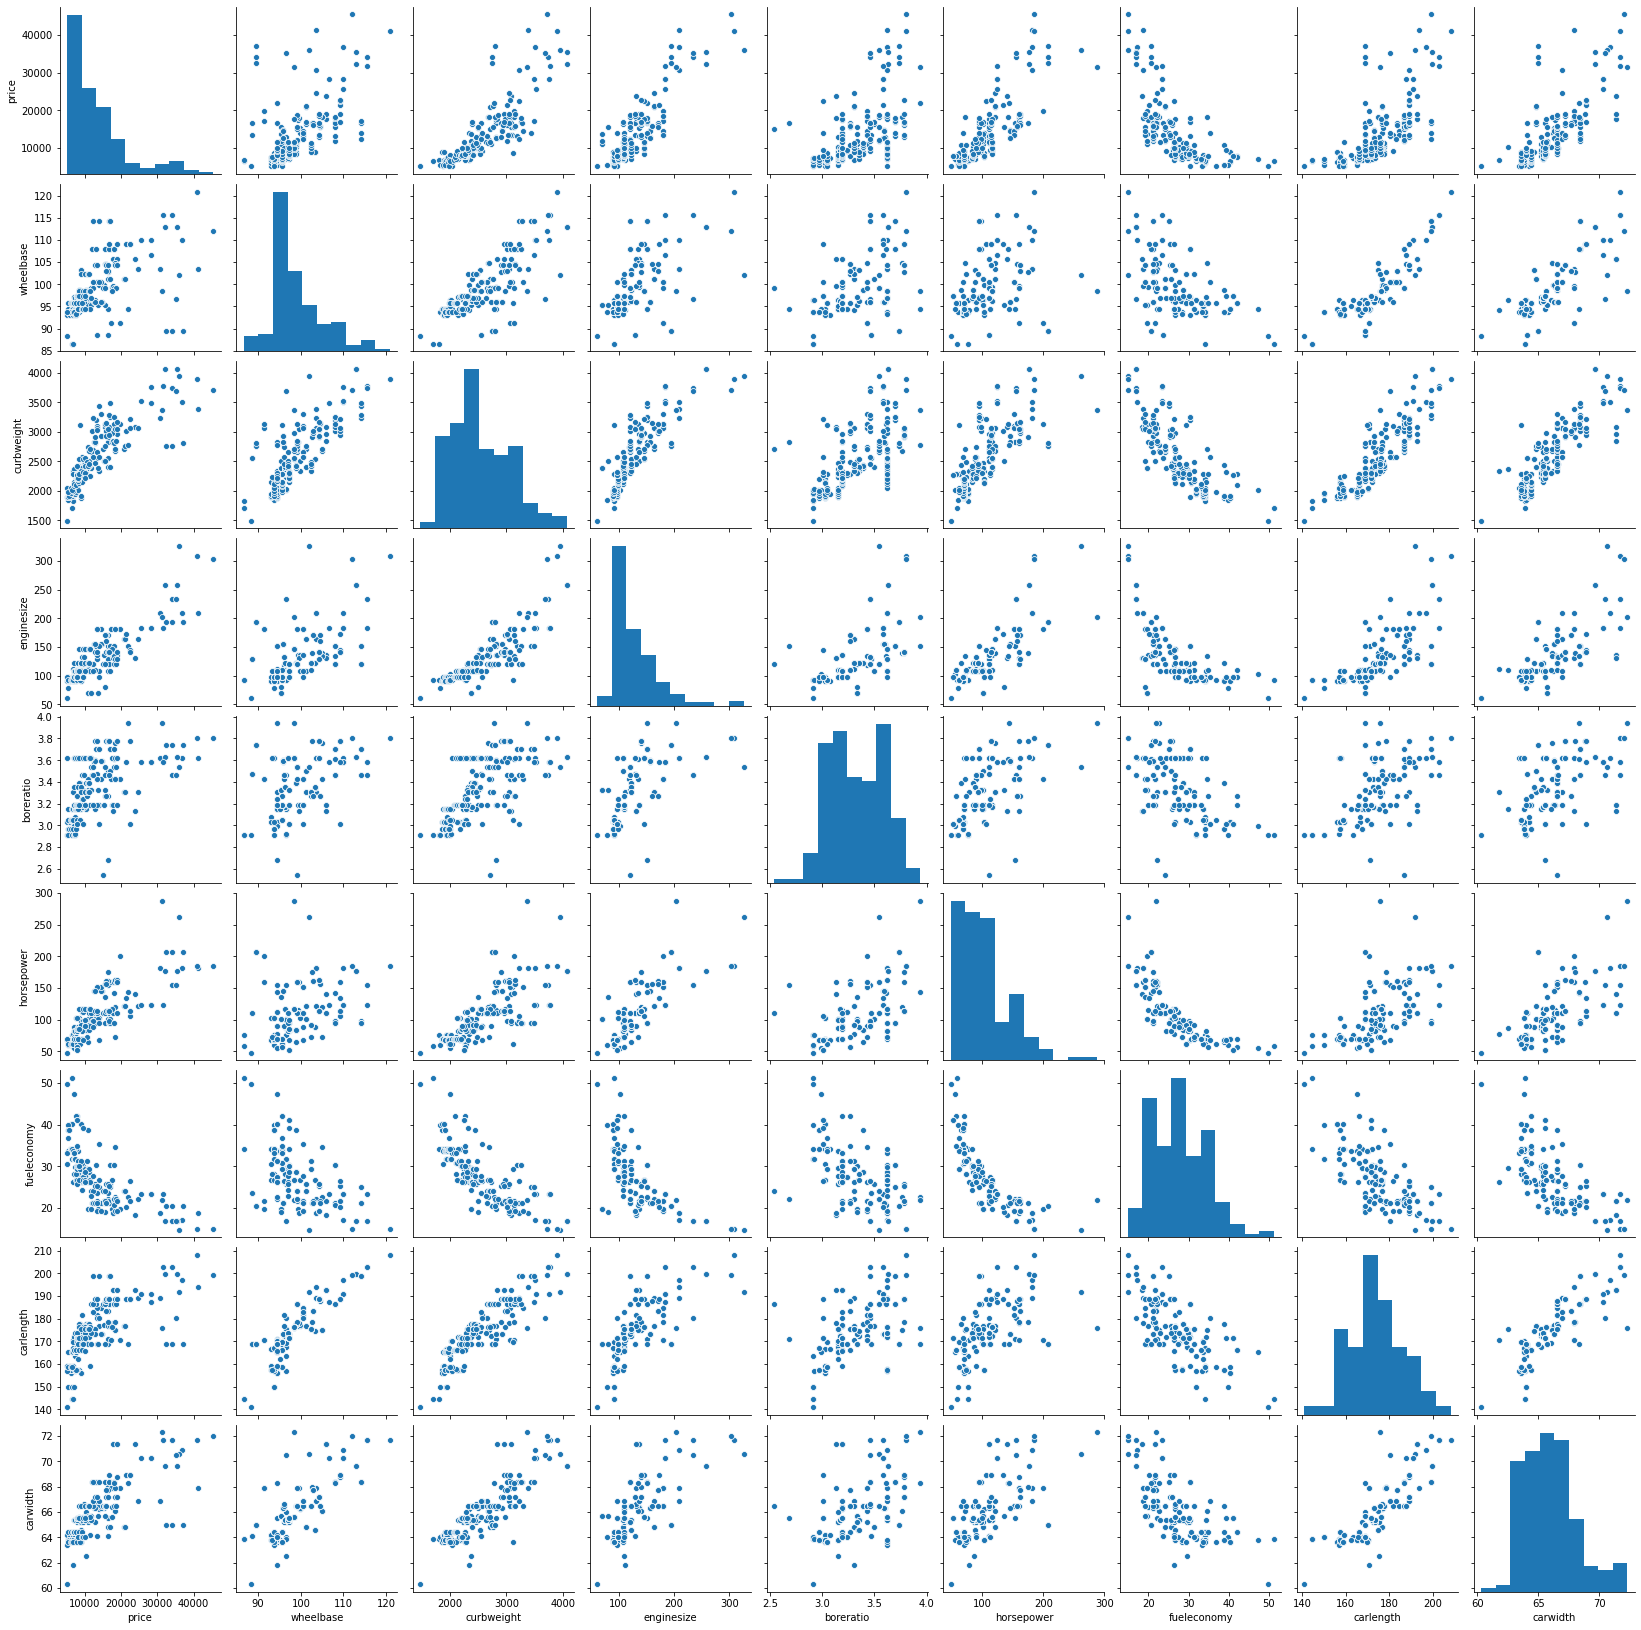

In [ ]:
sns.pairplot(cars_lr)
plt.show()

**Step 6 :** Dummy Variables

In [ ]:
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the cars_lr

cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)

In [ ]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
cars_lr.shape

(205, 29)

**Step 7 :** Train-Test Split and feature scaling

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,0.181818,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,0.387050,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


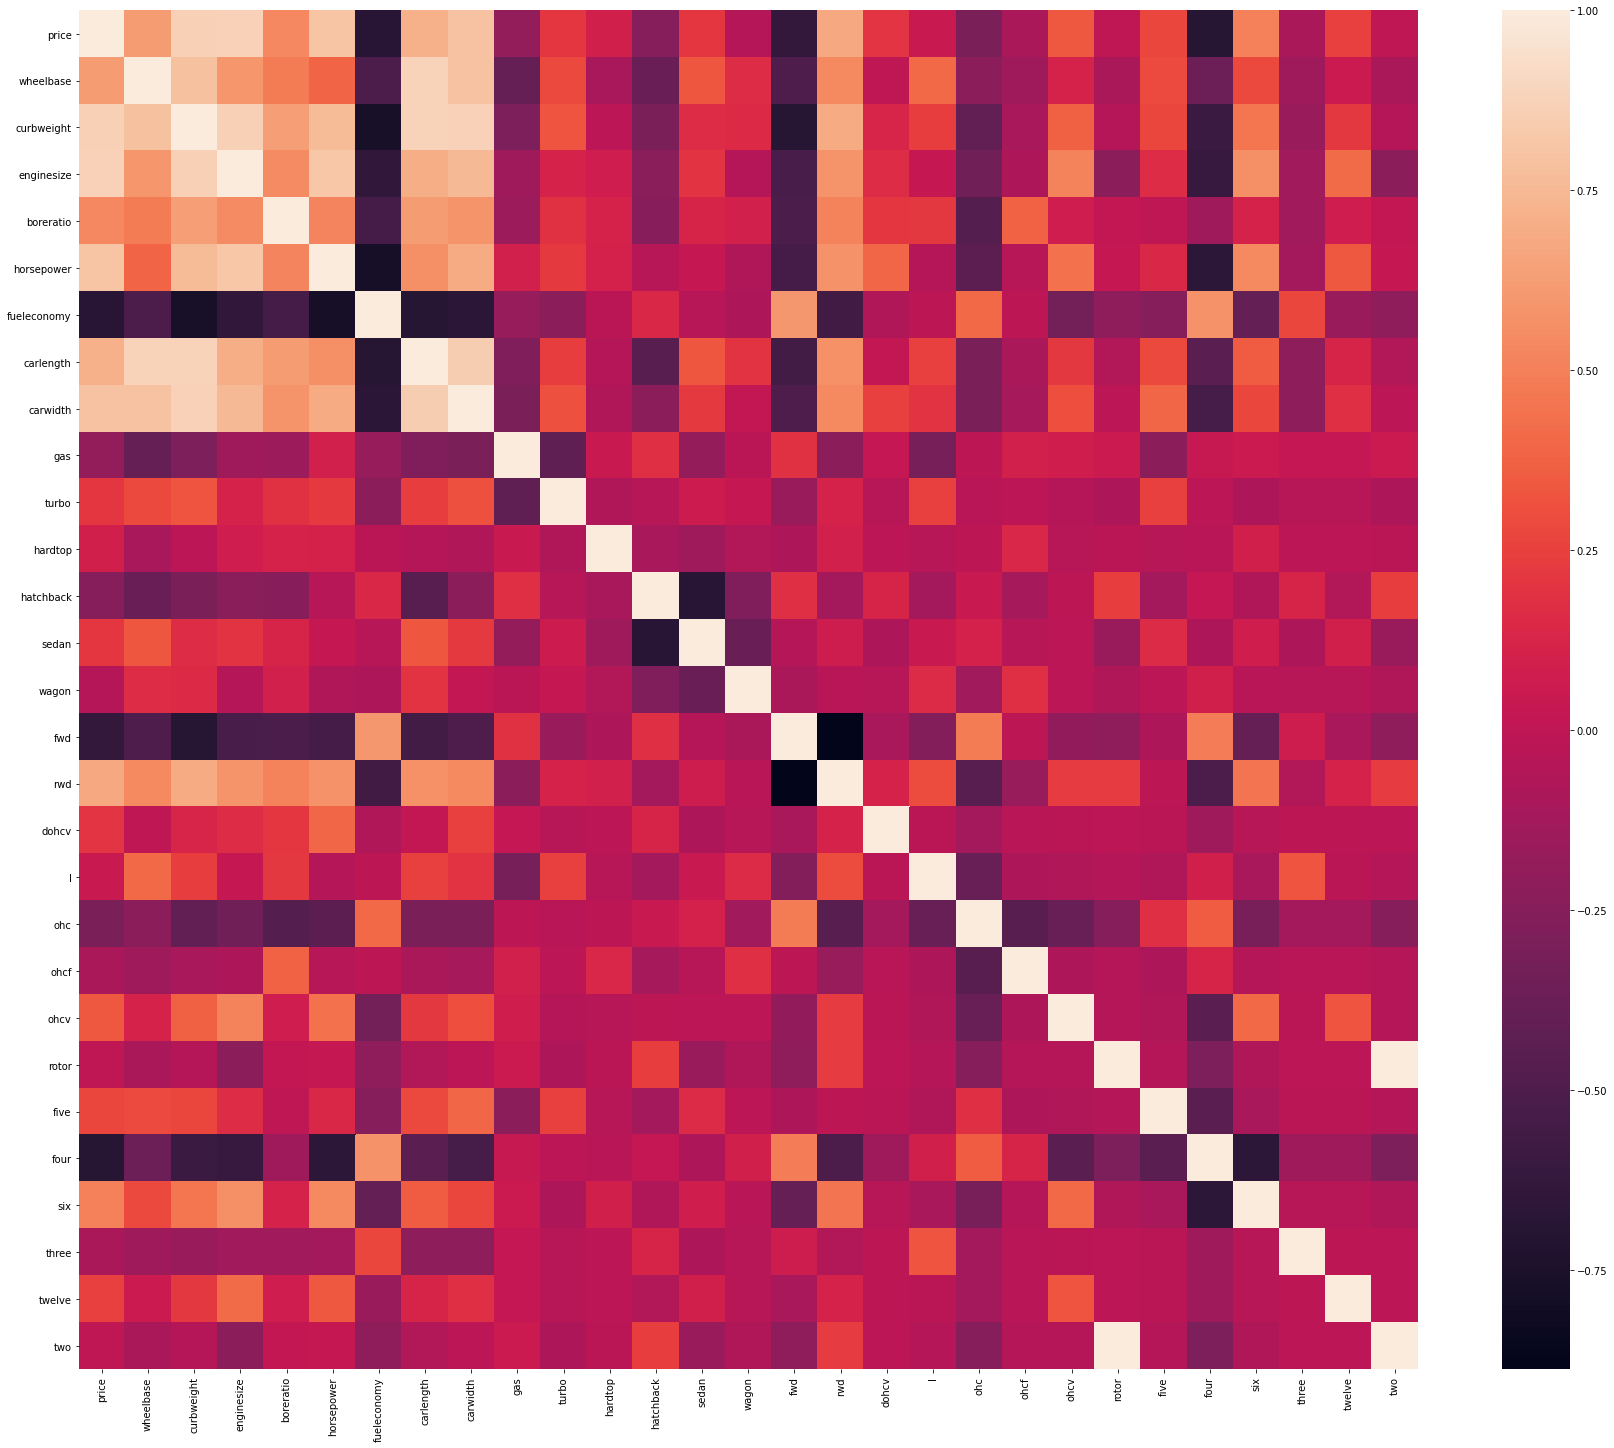

In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(df_train.corr())
plt.show()

In [ ]:
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
X_train.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,turbo,hardtop,hatchback,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


**STEP 8: Building Model**

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [ ]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 12),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 8),
 ('carwidth', False, 9),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 6),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 19),
 ('rwd', False, 11),
 ('dohcv', False, 2),
 ('l', False, 13),
 ('ohc', False, 5),
 ('ohcf', False, 7),
 ('ohcv', False, 10),
 ('rotor', False, 15),
 ('five', False, 4),
 ('four', True, 1),
 ('six', False, 3),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 16)]

In [ ]:
X_train.columns[rfe.support_]


Index(['wheelbase', 'curbweight', 'enginesize', 'horsepower', 'fueleconomy',
       'hatchback', 'sedan', 'wagon', 'four', 'twelve'],
      dtype='object')

In [ ]:
X_train_rfe=X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,wheelbase,curbweight,enginesize,horsepower,fueleconomy,hatchback,sedan,wagon,four,twelve
122,0.244828,0.272692,0.139623,0.083333,0.530864,0,1,0,1,0
125,0.272414,0.500388,0.339623,0.395833,0.213992,1,0,0,1,0
166,0.272414,0.314973,0.139623,0.266667,0.344307,1,0,0,1,0
1,0.068966,0.411171,0.260377,0.262500,0.244170,0,0,0,1,0
199,0.610345,0.647401,0.260377,0.475000,0.122085,0,0,1,1,0


In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
X_train_new=build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     81.91
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.26e-51
Time:                        11:57:36   Log-Likelihood:                 158.15
No. Observations:                 143   AIC:                            -294.3
Df Residuals:                     132   BIC:                            -261.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0291      0.061      0.479      

In [ ]:
X_train_new=X_train_rfe.drop(['twelve'],axis=1)

In [ ]:
X_train_new= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     91.36
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.58e-52
Time:                        11:57:36   Log-Likelihood:                 157.92
No. Observations:                 143   AIC:                            -295.8
Df Residuals:                     133   BIC:                            -266.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0357      0.060      0.597      

In [ ]:
X_train_new=X_train_new.drop(['fueleconomy'],axis=1)

In [ ]:
X_train_new= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     101.5
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           4.77e-53
Time:                        11:57:36   Log-Likelihood:                 156.68
No. Observations:                 143   AIC:                            -295.4
Df Residuals:                     134   BIC:                            -268.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0929      0.047      1.983      0.0

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,44.91
2,curbweight,12.04
6,sedan,7.24
5,hatchback,6.27
3,enginesize,5.91
1,wheelbase,4.95
4,horsepower,4.76
7,wagon,4.01
8,four,1.90


In [ ]:
X_train_new=X_train_new.drop(['curbweight'], axis=1)

In [ ]:
X_train_new= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           5.82e-53
Time:                        11:57:36   Log-Likelihood:                 153.89
No. Observations:                 143   AIC:                            -291.8
Df Residuals:                     135   BIC:                            -268.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1173      0.046      2.530      0.0

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,42.62
5,sedan,6.81
4,hatchback,5.96
2,enginesize,4.64
6,wagon,4.01
3,horsepower,3.81
1,wheelbase,2.13
7,four,1.88


In [ ]:
X_train_new=X_train_new.drop(['sedan'], axis=1)

In [ ]:
X_train_new= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     119.7
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           9.23e-52
Time:                        11:57:36   Log-Likelihood:                 148.34
No. Observations:                 143   AIC:                            -282.7
Df Residuals:                     136   BIC:                            -261.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0151      0.036      0.422      0.6

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,23.58
2,enginesize,4.46
3,horsepower,3.81
6,four,1.88
1,wheelbase,1.79
4,hatchback,1.32
5,wagon,1.14


In [ ]:
X_train_new=X_train_new.drop(['wagon'], axis=1)

In [ ]:
X_train_new= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     141.8
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           2.38e-52
Time:                        11:57:36   Log-Likelihood:                 147.10
No. Observations:                 143   AIC:                            -282.2
Df Residuals:                     137   BIC:                            -264.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0118      0.036      0.330      0.7

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,23.50
2,enginesize,4.35
3,horsepower,3.78
5,four,1.87
1,wheelbase,1.74
4,hatchback,1.24


In [ ]:
X_train_new=X_train_new.drop(['hatchback'], axis=1)

In [ ]:
X_train_new= build_model(X_train_new, y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     171.9
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.47e-52
Time:                        11:57:36   Log-Likelihood:                 144.84
No. Observations:                 143   AIC:                            -279.7
Df Residuals:                     138   BIC:                            -264.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0173      0.033     -0.518      0.6

In [ ]:
checkVIF(X_train_new)

,Features,VIF
0,const,19.96
2,enginesize,4.17
3,horsepower,3.65
4,four,1.85
1,wheelbase,1.62


**9.Residual Analysis of Model**

In [ ]:
lm=sm.OLS(y_train, X_train_new).fit()

In [ ]:
y_train_price=lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

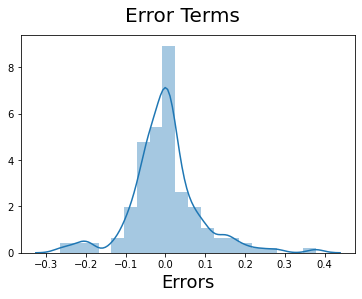

In [ ]:
fig=plt.figure()
sns.distplot((y_train-y_train_price),bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)

**10. Prediction and Evaluation**

In [ ]:
#Scaling test set
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
X_train_new=X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [ ]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7999388710107056

Text(0, 0.5, 'y_pred')

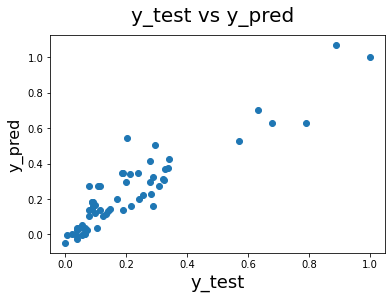

In [ ]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     171.9
Date:                Tue, 18 Aug 2020   Prob (F-statistic):           1.47e-52
Time:                        11:57:37   Log-Likelihood:                 144.84
No. Observations:                 143   AIC:                            -279.7
Df Residuals:                     138   BIC:                            -264.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0173      0.033     -0.518      0.6

**Inference :**
R-sqaured and Adjusted R-squared (extent of fit) - 0.833 and 0.828 - 90% variance explained.
F-stats and Prob(F-stats) (overall model fit) - 171.9 and 1.47e-52(approx. 0.0) - Model fit is significant and explained 90% variance is just not by chance.
p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the predictors are statistically significant.